In [57]:
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12, 12))

import seaborn as sns
sns.set(color_codes=True)
sns.set_style('darkgrid')

from utils import display

<Figure size 864x864 with 0 Axes>

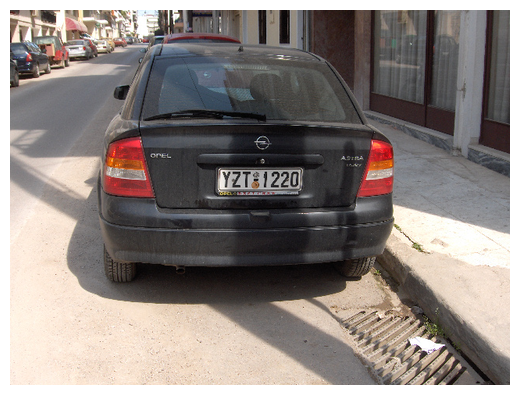

In [58]:
img = cv2.imread("images/car.png")
# img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
display(img)
#sns.distplot(img.ravel())

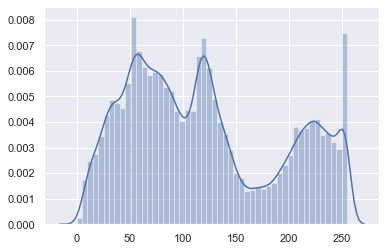

In [59]:
sns.distplot(img.ravel());

### Gamma Correction

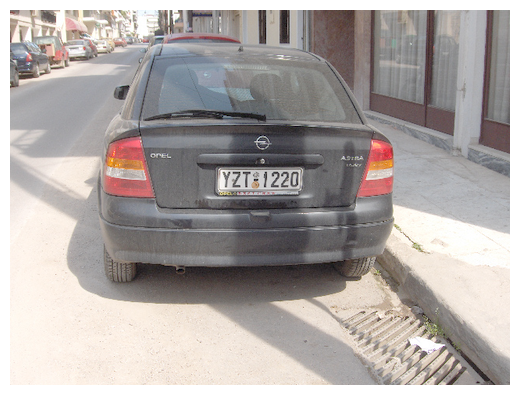

In [45]:
def adjust_gamma(image, gamma=1.0):
    inv_gamma = 1.0 / gamma
    # creates a lookup table for all possible pixel values between 0-255
    table = np.array(
        [((i / 255.0) ** inv_gamma) * 255 for i in np.arange(0, 256)]
    )
    table = table.astype(np.uint8)
    return cv2.LUT(image, table)

# apply gamma correction
gamma_corrected = adjust_gamma(img, gamma=1.8)
display(gamma_corrected)

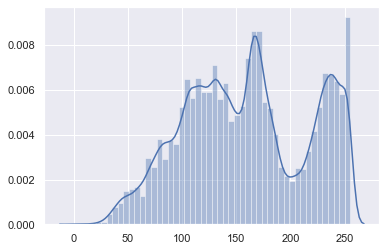

In [56]:
sns.distplot(gamma_corrected.ravel());

### Histogram Equalization

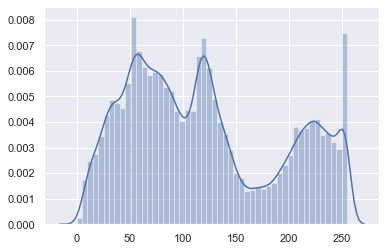

In [60]:
sns.distplot(img.ravel());

#### Intensity Image equalization 

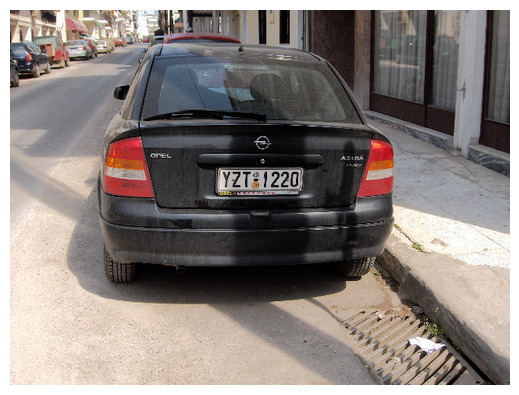

In [62]:
# 1. HSV/HSL 

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)
v_eq = cv2.equalizeHist(v)
hsv_eq = cv2.merge([h, s, v_eq])
rgb_eq = cv2.cvtColor(hsv_eq, cv2.COLOR_HSV2BGR)
display(rgb_eq)